In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('prac_3.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
zdf = df[['bmi','charges']]

In [5]:
z = np.abs(stats.zscore(zdf))

In [109]:
z

,bmi,charges
0,0.453320,0.298584
1,0.509621,0.953689
2,0.383307,0.728675
3,1.305531,0.719843
4,0.292556,0.776802
...,...,...
1333,0.050297,0.220551
1334,0.206139,0.914002
1335,1.014878,0.961596
1336,0.797813,0.930362


In [110]:
data_clean = zdf[(z<3).all(axis=1)]

In [111]:
data_clean.shape

(1327, 2)

In [112]:
Q1 = zdf.quantile(q=.25)
Q3 = zdf.quantile(q=.75)
IQR = zdf.apply(stats.iqr)

<h2> Data Seperation </h2>

In [113]:
data_clean2 = zdf[~((zdf < (Q1-1.5*IQR)) | (zdf > (Q3+1.5*IQR))).any(axis=1)]

In [114]:
outlier = zdf[((zdf < (Q1-1.5*IQR)) | (zdf > (Q3+1.5*IQR))).any(axis=1)]

In [115]:
data_clean2.shape

(1193, 2)

In [116]:
outlier.shape

(145, 2)

<h2> Median Calculation </h2>

In [117]:
median = df.median()

C:\Users\RA ELE\AppData\Local\Temp\ipykernel_13808\1103551601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()


In [118]:
median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

<h2> BoxPlots </h2>

{'whiskers': [<matplotlib.lines.Line2D at 0x28fa77069d0>,
 'caps': [<matplotlib.lines.Line2D at 0x28fa7706f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x28fa7706760>],
 'medians': [<matplotlib.lines.Line2D at 0x28fa7713550>],
 'fliers': [<matplotlib.lines.Line2D at 0x28fa7713820>],
 'means': []}

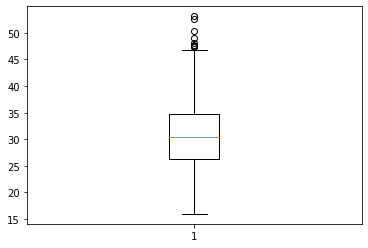

In [119]:
plt.boxplot(df['bmi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28fa77482e0>,
 'caps': [<matplotlib.lines.Line2D at 0x28fa7748880>,
 'boxes': [<matplotlib.lines.Line2D at 0x28fa7748130>],
 'medians': [<matplotlib.lines.Line2D at 0x28fa7748e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x28fa7751130>],
 'means': []}

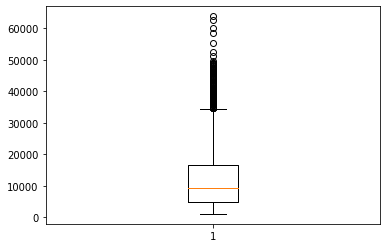

In [120]:
plt.boxplot(df['charges'])

<h1> Replacing with Median </h1>

In [156]:
outlier = zdf[((zdf < (Q1-1.5*IQR)) | (zdf > (Q3+1.5*IQR))).any(axis=1)]

In [157]:
median = df.median()

C:\Users\RA ELE\AppData\Local\Temp\ipykernel_13808\1103551601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()


In [158]:
outlier

,bmi,charges
14,42.130,39611.75770
19,35.300,36837.46700
23,31.920,37701.87680
29,36.300,38711.00000
30,35.600,35585.57600
...,...,...
1301,30.875,46718.16325
1303,27.800,37829.72420
1313,34.700,36397.57600
1317,53.130,1163.46270


In [159]:
median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [160]:
outlier['bmi'] = median['bmi']

C:\Users\RA ELE\AppData\Local\Temp\ipykernel_13808\2047345679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['bmi'] = median['bmi']


In [161]:
outlier['charges'] = median['charges']

C:\Users\RA ELE\AppData\Local\Temp\ipykernel_13808\1190623989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['charges'] = median['charges']


In [162]:
outlier

,bmi,charges
14,30.4,9382.033
19,30.4,9382.033
23,30.4,9382.033
29,30.4,9382.033
30,30.4,9382.033
...,...,...
1301,30.4,9382.033
1303,30.4,9382.033
1313,30.4,9382.033
1317,30.4,9382.033
